In [1]:
from tournament.agents.constant import AllC, AllD
from tournament.agents.pavlov import Pavlov
from tournament.agents.q_learning.dqn import DeepQLearner
from tournament.agents.tft import TFTT, GenerousTFT, TitForTat, OmegaTFT
from tournament.environments.single import SingleRuleBasedAgentEnvironment
from tournament.environments.multiple import MultipleRuleBasedAgentEnvironment
from tournament.action import Action
from tournament.agents.agents import AGENTS
from tournament.agents.axelrod_first import (
    Davis,
    Downing,
    Feld,
    Grofman,
    Grudger,
    Joss,
    Nydegger,
    Shubik,
    SteinAndRapoport,
    TidemanAndChieruzzi,
    Tullock,
)
from tournament.agents.axelrod_second import (
    Borufsen,
    Champion,
    Leyvraz,
    SecondByBlackK83R,
    SecondByCave,
    SecondByGraaskampKatzen,
    SecondByHarrington,
    SecondByTidemanAndChieruzzi,
    SecondByWeiner,
    SecondByWhiteK72R,
    SecondByWmAdams,
)
from tournament.tournament import RoundRobinTournament

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# plt.rcParams["figure.figsize"] = (20, 12)
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
agents = [TitForTat, Joss, Downing]

env = MultipleRuleBasedAgentEnvironment(agents)

In [3]:

class QNetwork(nn.Module):
    def __init__(self, lookback):
        super().__init__()

        self.flatten = nn.Flatten()
        self.gru = nn.GRU(2, 2, 1, batch_first=True)
        self.layer4 = nn.Linear(2 * lookback, 2)

        nn.init.kaiming_uniform_(self.layer4.weight, mode="fan_in", nonlinearity="relu")

    def forward(self, x):
        x = x.unsqueeze(dim=0)
        x, hn = self.gru(x)
        x = self.flatten(x)
        x = torch.relu(self.layer4(x))

        return x

class QLearningTest(DeepQLearner):
    def __init__(self):
        super().__init__()

        self.lookback = 4
        self.epsilon = 0.2

        self._learning_rate = 0.01
        self._discount_rate = 0.99
        self._q_network = QNetwork(self.lookback)


agent = QLearningTest()

In [4]:
env.train(
    trainee=agent,
    limit=200,
    epochs=100,
)

[19:02:04] Commencement of training.
[19:02:07] Completed epoch 1: 1.5570745419727852
[19:02:09] Completed epoch 2: 1.545620604319726
[19:02:12] Completed epoch 3: 1.5445804028798173
[19:02:15] Completed epoch 4: 1.5417686354931963
[19:02:18] Completed epoch 5: 1.5477482417278903
[19:02:21] Completed epoch 6: 1.540484645884353
[19:02:24] Completed epoch 7: 1.5386296964723027
[19:02:27] Completed epoch 8: 1.5402593177465982
[19:02:29] Completed epoch 9: 1.5395823565154947
[19:02:32] Completed epoch 10: 1.538790787530612
[19:02:34] Completed epoch 11: 1.5412492007854046
[19:02:37] Completed epoch 12: 1.5407284340532876
[19:02:39] Completed epoch 13: 1.5424031698953424
[19:02:42] Completed epoch 14: 1.5432434196647227
[19:02:44] Completed epoch 15: 1.5443049694648523
[19:02:47] Completed epoch 16: 1.543879658873299
[19:02:49] Completed epoch 17: 1.5477200710964383
[19:02:52] Completed epoch 18: 1.549605993072562
[19:02:56] Completed epoch 19: 1.5493635723845325
[19:03:01] Completed epoch 

In [5]:
print(agent._q_network)
print(env.counts)

s = sum(env.counts.values())
print({a: env.counts[a] / s for a in env.counts})

QNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (gru): GRU(2, 2, batch_first=True)
  (layer4): Linear(in_features=8, out_features=2, bias=True)
)
{<Action.COOPERATE: 0>: 53967, <Action.DEFECT: 1>: 6033}
{<Action.COOPERATE: 0>: 0.89945, <Action.DEFECT: 1>: 0.10055}


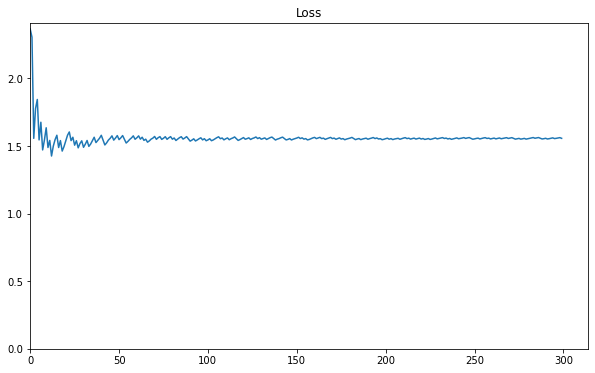

In [6]:
plt.title("Loss")
plt.plot(env.metric_history)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

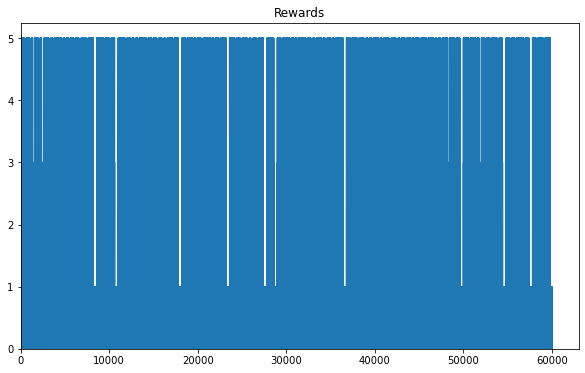

In [7]:
plt.title("Rewards")
plt.plot(env.rewards)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

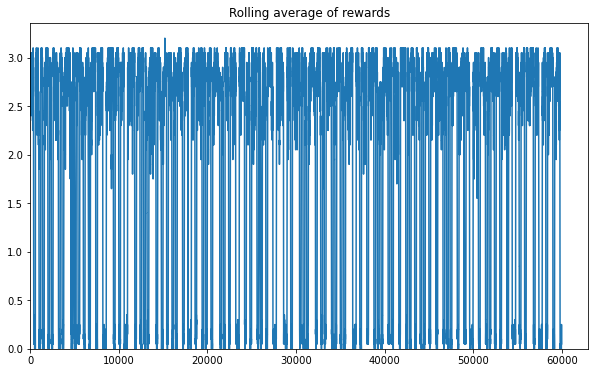

In [8]:
N = 20

plt.title("Rolling average of rewards")
plt.plot(np.convolve(env.rewards, np.ones(N), mode='valid') / N)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

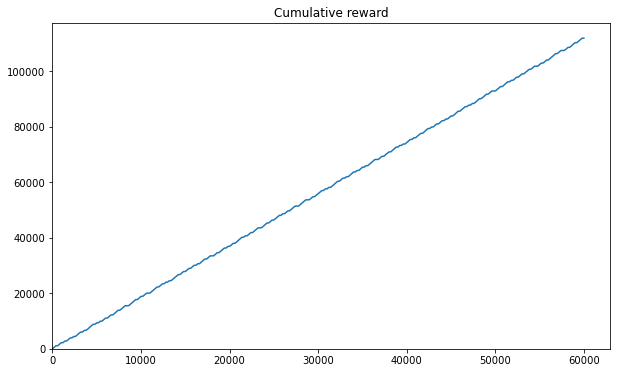

In [9]:
plt.title("Cumulative reward")
plt.plot(np.cumsum(env.rewards))
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

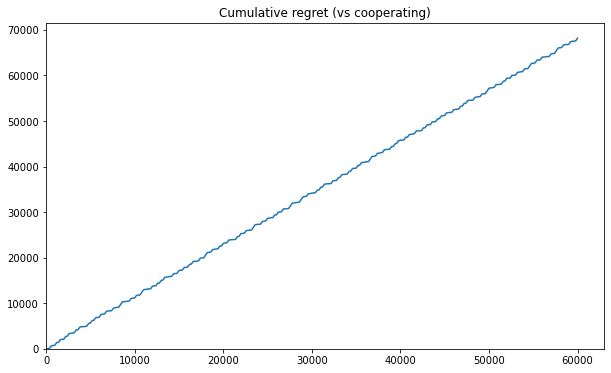

In [10]:
plt.title("Cumulative regret (vs cooperating)")
plt.plot(np.cumsum(3 - np.array(env.rewards)))
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

[{<Action.COOPERATE: 0>: 0.8566666666666667, <Action.DEFECT: 1>: 0.14333333333333334}, {<Action.COOPERATE: 0>: 0.895, <Action.DEFECT: 1>: 0.105}, {<Action.COOPERATE: 0>: 0.9183333333333333, <Action.DEFECT: 1>: 0.08166666666666667}, {<Action.COOPERATE: 0>: 0.9233333333333333, <Action.DEFECT: 1>: 0.07666666666666666}, {<Action.COOPERATE: 0>: 0.9066666666666666, <Action.DEFECT: 1>: 0.09333333333333334}, {<Action.COOPERATE: 0>: 0.8933333333333333, <Action.DEFECT: 1>: 0.10666666666666667}, {<Action.COOPERATE: 0>: 0.8633333333333333, <Action.DEFECT: 1>: 0.13666666666666666}, {<Action.COOPERATE: 0>: 0.8883333333333333, <Action.DEFECT: 1>: 0.11166666666666666}, {<Action.COOPERATE: 0>: 0.9016666666666666, <Action.DEFECT: 1>: 0.09833333333333333}, {<Action.COOPERATE: 0>: 0.8916666666666667, <Action.DEFECT: 1>: 0.10833333333333334}, {<Action.COOPERATE: 0>: 0.8916666666666667, <Action.DEFECT: 1>: 0.10833333333333334}, {<Action.COOPERATE: 0>: 0.8933333333333333, <Action.DEFECT: 1>: 0.10666666666666

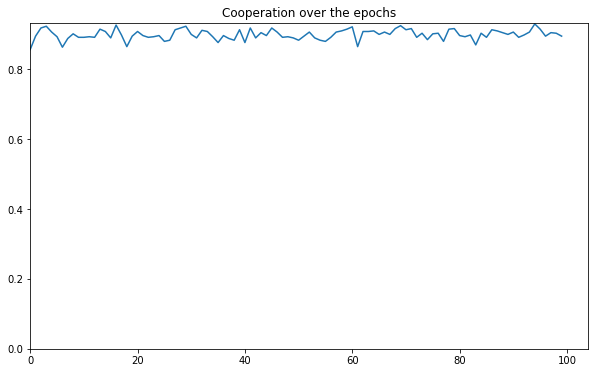

In [11]:
plt.title("Cooperation over the epochs")
print(env.normalised_epoch_counts)
plt.plot([x[Action.COOPERATE] for x in env.normalised_epoch_counts])
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

In [12]:
# torch.save(agent._q_network.state_dict(), "model.pt")

In [13]:
agent._q_network.eval()

QNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (gru): GRU(2, 2, batch_first=True)
  (layer4): Linear(in_features=8, out_features=2, bias=True)
)

In [14]:
tournament = RoundRobinTournament(AGENTS, [agent])

scores, times = tournament.play(
    continuation_probability=0.99654, repetitions=20, jobs=12
)

results = [
    (agent, round(sum(scores[agent]) / len(scores[agent])), sum(times[agent]))
    for agent in scores
]
results.sort(key=lambda x: x[1], reverse=True)

for c, score, time in results:
    print(f"{c.__name__:<30} {score:<20} {time:<20}")


100%|██████████| 961/961 [03:38<00:00,  4.39matches/s] 

SecondByWhiteK72R              820                  12.776557           
TFTT                           819                  12.924878999999999  
SecondByBlackK83R              812                  16.187643           
SecondByGraaskampKatzen        792                  12.947964           
GradualTFT                     790                  112.951731          
GenerousTFT                    788                  12.602001           
Shubik                         784                  11.266022999999999  
Borufsen                       784                  12.854077           
Leyvraz                        783                  50.163515000000004  
TitForTat                      780                  9.459977            
Grudger                        778                  10.684955000000002  
Champion                       770                  52.01550999999999   
SteinAndRapoport               767                  26.360203           
SecondByTidemanAndChieruzzi    767                 